<a href="https://colab.research.google.com/github/karenkaroline-bastos/Desafio_TeleconX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd

In [2]:
# Lê os dados diretamente da URL
url = 'https://raw.githubusercontent.com/karenkaroline-bastos/Desafio_TeleconX_BR/refs/heads/main/TelecomX_Data.json'

In [3]:
# Cria um DataFrame chamado df
df = pd.read_json(url) # Atribuir á uma variável os dados importados
df = pd.DataFrame(df)

# Mostra as 5 primeiras linhas da tabela
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
import json
import requests

In [5]:
# Requisição para obter os dados da internet
resposta = requests.get(url)

In [6]:
# Convertendo texto JSON para objeto Python (lista de dicionários)
resultado = json.loads(resposta.text)

In [7]:
# Normalizando (transformando em DataFrame plano)
df = pd.json_normalize(resultado, sep='/')

In [8]:
# Verificar informações iniciais
df.head()

,customerID,Churn,customer/gender,customer/SeniorCitizen,customer/Partner,customer/Dependents,customer/tenure,phone/PhoneService,phone/MultipleLines,internet/InternetService,...,internet/OnlineBackup,internet/DeviceProtection,internet/TechSupport,internet/StreamingTV,internet/StreamingMovies,account/Contract,account/PaperlessBilling,account/PaymentMethod,account/Charges/Monthly,account/Charges/Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Verificar valores ausentes
print(df.isnull().sum())

customerID                   0
Churn                        0
customer/gender              0
customer/SeniorCitizen       0
customer/Partner             0
customer/Dependents          0
customer/tenure              0
phone/PhoneService           0
phone/MultipleLines          0
internet/InternetService     0
internet/OnlineSecurity      0
internet/OnlineBackup        0
internet/DeviceProtection    0
internet/TechSupport         0
internet/StreamingTV         0
internet/StreamingMovies     0
account/Contract             0
account/PaperlessBilling     0
account/PaymentMethod        0
account/Charges/Monthly      0
account/Charges/Total        0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer/gender            7267 non-null   object 
 3   customer/SeniorCitizen     7267 non-null   int64  
 4   customer/Partner           7267 non-null   object 
 5   customer/Dependents        7267 non-null   object 
 6   customer/tenure            7267 non-null   int64  
 7   phone/PhoneService         7267 non-null   object 
 8   phone/MultipleLines        7267 non-null   object 
 9   internet/InternetService   7267 non-null   object 
 10  internet/OnlineSecurity    7267 non-null   object 
 11  internet/OnlineBackup      7267 non-null   object 
 12  internet/DeviceProtection  7267 non-null   object 
 13  internet/TechSupport       7267 non-null   objec

In [11]:
# Identificando cada coluna com o tipo correto dos seus valores.
colunas_para_formatar = []

# Padroniza strings: tira espaços e coloca só a primeira letra maiúscula
for col in colunas_para_formatar:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.capitalize()

# Converte a coluna numérica
df['account/Charges/Total'] = pd.to_numeric(df['account/Charges/Total'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer/gender            7267 non-null   object 
 3   customer/SeniorCitizen     7267 non-null   int64  
 4   customer/Partner           7267 non-null   object 
 5   customer/Dependents        7267 non-null   object 
 6   customer/tenure            7267 non-null   int64  
 7   phone/PhoneService         7267 non-null   object 
 8   phone/MultipleLines        7267 non-null   object 
 9   internet/InternetService   7267 non-null   object 
 10  internet/OnlineSecurity    7267 non-null   object 
 11  internet/OnlineBackup      7267 non-null   object 
 12  internet/DeviceProtection  7267 non-null   object 
 13  internet/TechSupport       7267 non-null   objec

In [12]:
df

,customerID,Churn,customer/gender,customer/SeniorCitizen,customer/Partner,customer/Dependents,customer/tenure,phone/PhoneService,phone/MultipleLines,internet/InternetService,...,internet/OnlineBackup,internet/DeviceProtection,internet/TechSupport,internet/StreamingTV,internet/StreamingMovies,account/Contract,account/PaperlessBilling,account/PaymentMethod,account/Charges/Monthly,account/Charges/Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
# Verificar valores nulos:
print("VALORES NULOS:\n--------------\n")
print(df.isnull().sum())

VALORES NULOS:
--------------

customerID                    0
Churn                         0
customer/gender               0
customer/SeniorCitizen        0
customer/Partner              0
customer/Dependents           0
customer/tenure               0
phone/PhoneService            0
phone/MultipleLines           0
internet/InternetService      0
internet/OnlineSecurity       0
internet/OnlineBackup         0
internet/DeviceProtection     0
internet/TechSupport          0
internet/StreamingTV          0
internet/StreamingMovies      0
account/Contract              0
account/PaperlessBilling      0
account/PaymentMethod         0
account/Charges/Monthly       0
account/Charges/Total        11
dtype: int64


In [14]:
# Excluindo todos os valores nulos:
df = df.dropna()

In [15]:
# Substituindo apenas strings vazia da coluna 'Churn' por 'Não informado':
df['Churn'] = df['Churn'].replace('', 'Não informado')

/tmp/ipython-input-3328672236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].replace('', 'Não informado')


In [16]:
# Listando os valores únicos da coluna "Churn", onde substituimos valor nulo por 'Não informado':
df['Churn'].unique()

array(['No', 'Yes', 'Não informado'], dtype=object)

In [17]:
df

,customerID,Churn,customer/gender,customer/SeniorCitizen,customer/Partner,customer/Dependents,customer/tenure,phone/PhoneService,phone/MultipleLines,internet/InternetService,...,internet/OnlineBackup,internet/DeviceProtection,internet/TechSupport,internet/StreamingTV,internet/StreamingMovies,account/Contract,account/PaperlessBilling,account/PaymentMethod,account/Charges/Monthly,account/Charges/Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [18]:
# Criar uma coluna com tempo estimado em meses
df['meses_estimados'] = df['account/Charges/Total'] / df['account/Charges/Monthly']

# Criar a coluna Conta_Diarias
df['Conta_Diarias'] = (df['account/Charges/Total'] / df['meses_estimados']) / 30

df.head()

/tmp/ipython-input-3090632801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meses_estimados'] = df['account/Charges/Total'] / df['account/Charges/Monthly']
/tmp/ipython-input-3090632801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conta_Diarias'] = (df['account/Charges/Total'] / df['meses_estimados']) / 30


,customerID,Churn,customer/gender,customer/SeniorCitizen,customer/Partner,customer/Dependents,customer/tenure,phone/PhoneService,phone/MultipleLines,internet/InternetService,...,internet/TechSupport,internet/StreamingTV,internet/StreamingMovies,account/Contract,account/PaperlessBilling,account/PaymentMethod,account/Charges/Monthly,account/Charges/Total,meses_estimados,Conta_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


#🗃️ Carga

In [19]:
# Salvar como CSV para usar na análise
df.to_csv("TelecomX_Transformado.csv", index=False)

#📊 Análise Exploratória dos Dados (EDA)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [21]:
df[['customer/tenure', 'account/Charges/Monthly', 'account/Charges/Total', 'Conta_Diarias']].describe().T

,count,mean,std,min,25%,50%,75%,max
customer/tenure,7256.0,32.395535,24.558067,1.000000,9.000000,29.000000,55.000000,72.000000
account/Charges/Monthly,7256.0,64.755423,30.125739,18.250000,35.450000,70.300000,89.900000,118.750000
account/Charges/Total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
Conta_Diarias,7256.0,2.158514,1.004191,0.608333,1.181667,2.343333,2.996667,3.958333


Evasão De Clientes na Totalidade:

In [22]:
# Substituir os valores de churn para rótulos desejados
df['Churn'] = df['Churn'].replace({
    'Yes': 'Sim',
    'No': 'Não',
    '': 'Não informado'
})

/tmp/ipython-input-452904952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].replace({


In [23]:
df['Churn']

,Churn
0,Não
1,Não
2,Sim
3,Sim
4,Sim
...,...
7262,Não
7263,Sim
7264,Não
7265,Não


In [24]:
# Contagem dos valores
contagem = df['Churn'].value_counts()
labels = contagem.index
sizes = contagem.values

In [25]:
# Explode apenas para 'Sim' (Inativo)
explode = [0.03 if label == 'Sim' else 0 for label in labels]

# Gráfico Evasão de Clientes

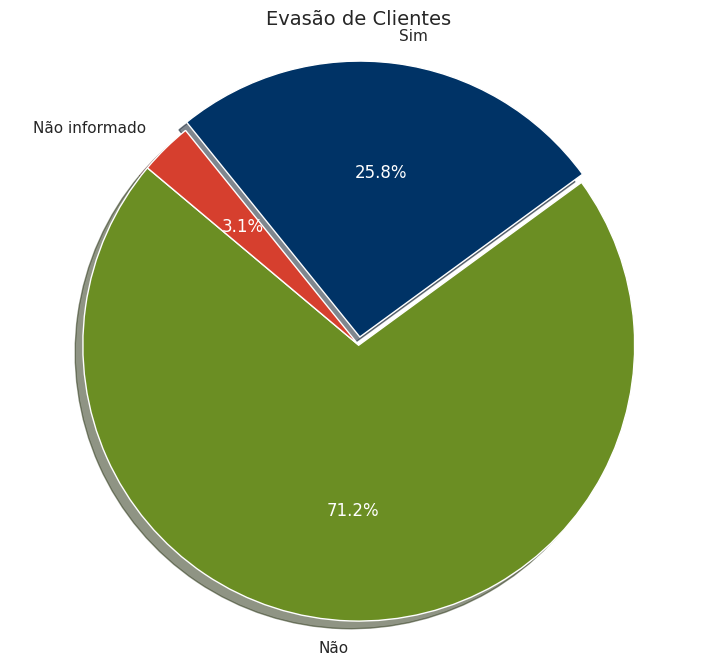

In [56]:
# Gráfico
fig, ax = plt.subplots(figsize=(9, 8))

# Cores de acordo com os labels atuais
cor_mapa = {
    'Não': '#6B8E23',          # Verde → Ativo
    'Sim': '#003366',           # Azul → Inativo
    'Não informado': '#d63f2e'  # Vermelho
}
colors = [cor_mapa[label] for label in labels]

wedges, texts, autotexts = ax.pie(
                                  sizes,
                                  explode=explode,
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  shadow=True,
                                  startangle=140
                                  )
# Inserir os nomes no centro das fatias
for autotext in autotexts:
    autotext.set_color('white')


# Título e layout
plt.title('Evasão de Clientes', fontsize=14)
plt.axis('equal')
plt.show()

In [58]:
# Salvar Imagem do Gráfico
fig.savefig('grafico_evasao_clientes.png', transparent=False, dpi=200, bbox_inches='tight')

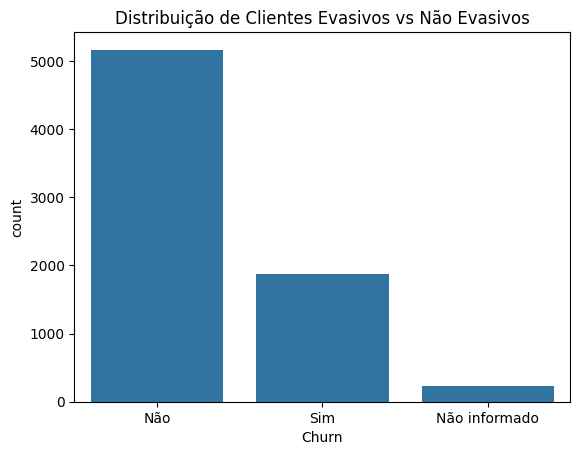

In [29]:
# Distribuição geral de evasão
sns.countplot(data=df, x='Churn')
plt.title("Distribuição de Clientes Evasivos vs Não Evasivos")


plt.show()

Evasão de Clientes por valores

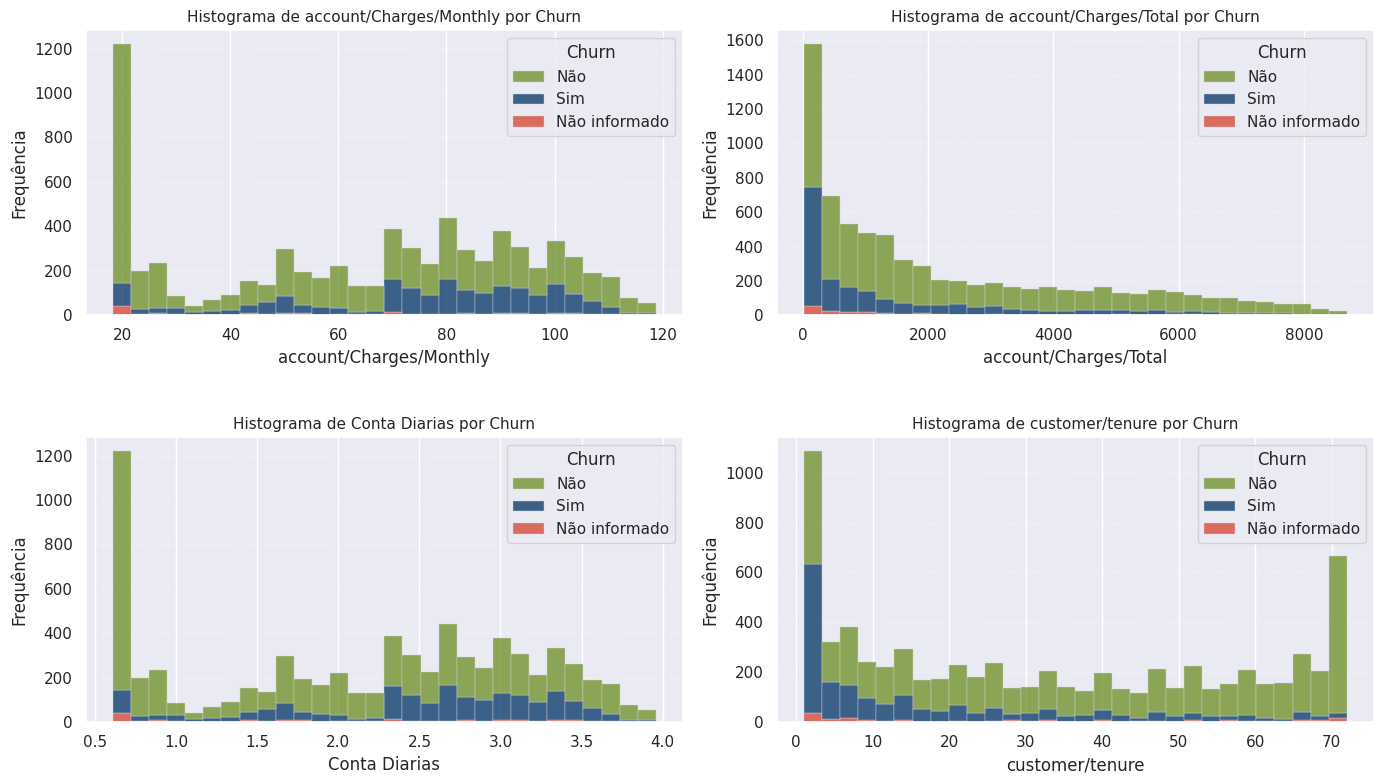

In [34]:
# Paleta de cores personalizada
paleta = {
    'Sim': '#003366',           # Azul → Inativo
    'Não': '#6B8E23',          # Verde → Ativo
    'Não informado': '#d63f2e'  # Vermelho
}

# Lista de variáveis numéricas
variaveis_numericas = ['account/Charges/Monthly', 'account/Charges/Total', 'Conta_Diarias', 'customer/tenure']

# Criar subplots - 2 colunas
n = len(variaveis_numericas)
ncols = 2
nrows = (n + 1) // ncols  # garante linhas suficientes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Plotar os gráficos
for i, var in enumerate(variaveis_numericas):
    sns.histplot(
        data=df,
        x=var,
        hue='Churn',
        multiple='stack',
        palette=paleta,
        bins=30,
        edgecolor='lightgray',
        linewidth=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f'Histograma de {var.replace("_", " ")} por Churn', fontsize=11)
    axes[i].set_xlabel(var.replace('_', ' '))
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Esconde gráficos vazios, se sobrar espaço
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para espaçamento entre os gráficos
plt.tight_layout(h_pad=3.0)  # h_pad ajusta o espaçamento vertical entre linhas
plt.show()

Evasão de Clientes por *categorias*

In [36]:
# Traduzindo as colunas
df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer/gender': 'Gênero',
    'customer/SeniorCitizen': 'Idoso',
    'customer/Partner': 'Possui_Companheiro',
    'customer/Dependents': 'Possui_Dependentes',
    'customer/tenure': 'Meses_de_Contrato',
    'phone/PhoneService': 'Telefone_Ativo',
    'phone/MultipleLines': 'Multiplas_Linhas',
    'internet/InternetService': 'Tipo_Internet',
    'internet/OnlineSecurity': 'Seguranca_Online',
    'internet/OnlineBackup': 'Backup_Online',
    'internet/DeviceProtection': 'Protecao_Dispositivo',
    'internet/TechSupport': 'Suporte_Tecnico',
    'internet/StreamingTV': 'Streaming_TV',
    'internet/StreamingMovies': 'Streaming_Filmes',
    'account/Contract': 'Tipo_Contrato',
    'account/PaperlessBilling': 'Fatura_Digital',
    'account/PaymentMethod': 'Forma_Pagamento',
    'account/Charges/Monthly': 'Valor_Mensal',
    'account/Charges/Total': 'Valor_Total',
    'tempo_estimado_meses': 'Meses_Estimados',
    'Conta_Diarias': 'Conta_Diaria'
}, inplace=True)

df.head()

/tmp/ipython-input-3371922338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


,ID_Cliente,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total,meses_estimados,Conta_Diaria
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,2.186667
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,1.996667
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,2.463333
3,0011-IGKFF,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,3.266667
4,0013-EXCHZ,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,2.796667


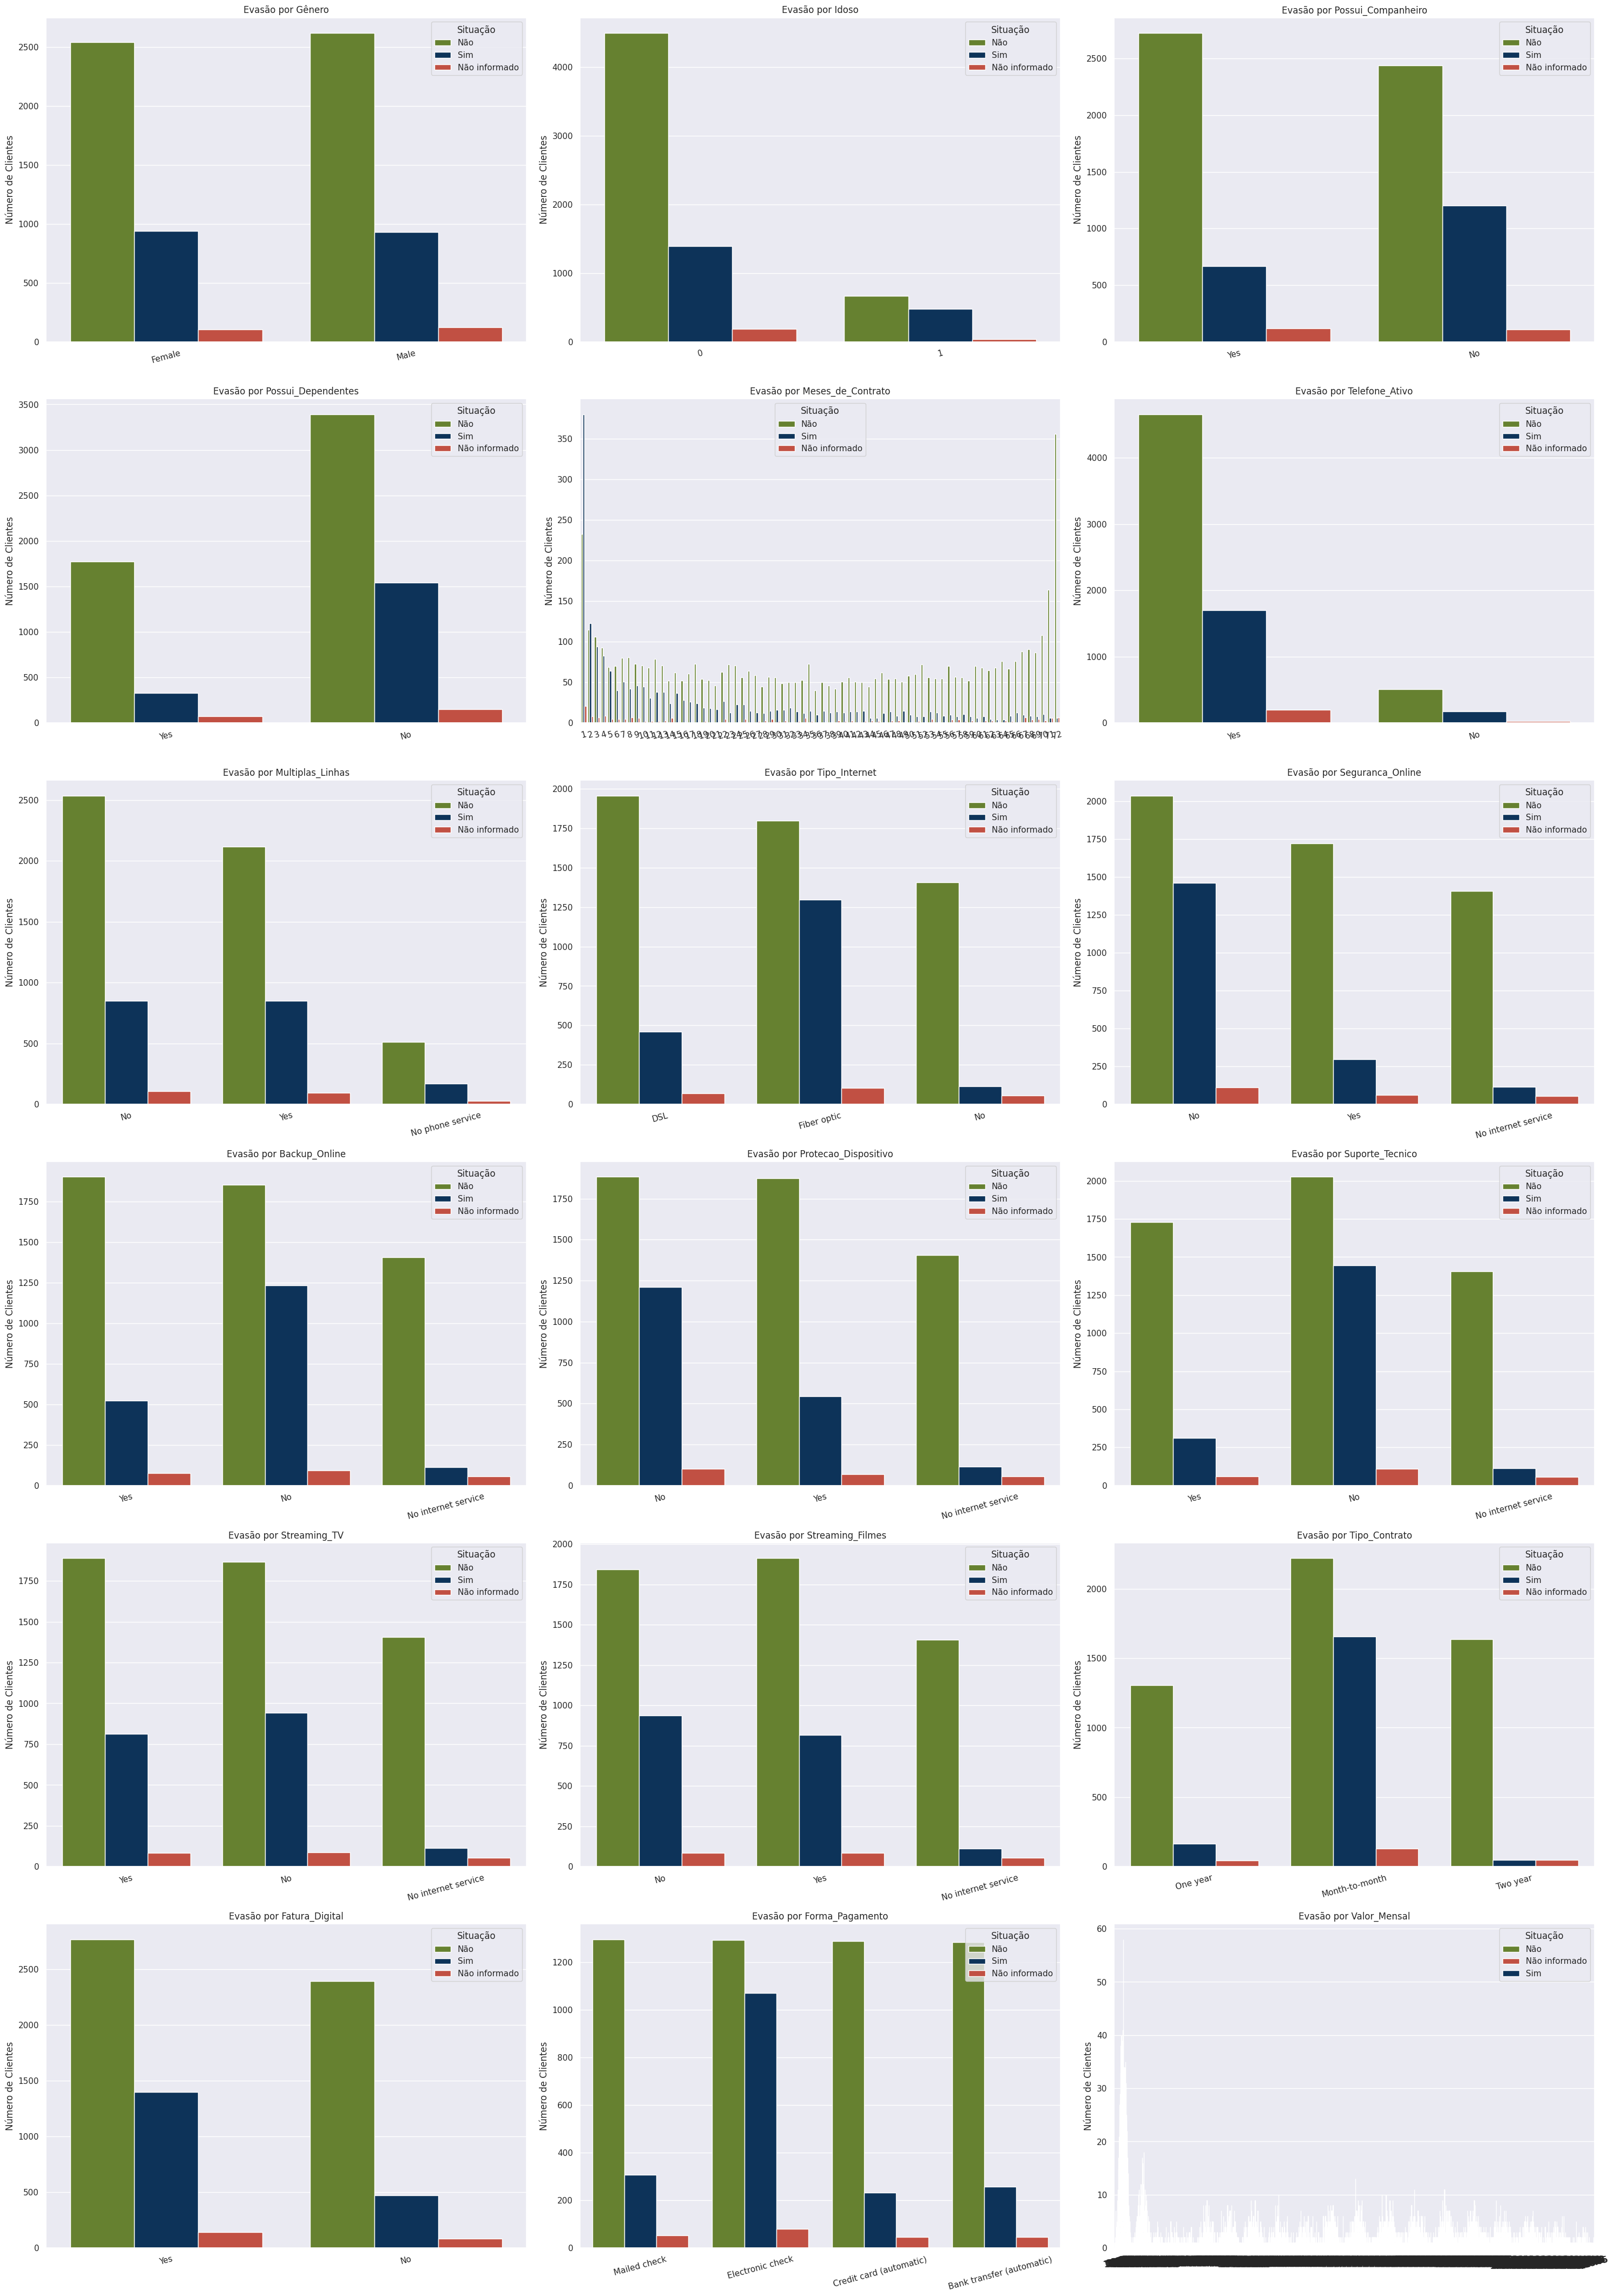

In [39]:
# Lista de colunas categóricas
variaveis_categoricas = [
    'Gênero',
    'Idoso',
    'Possui_Companheiro',
    'Possui_Dependentes',
    'Meses_de_Contrato', # This is actually numerical, will be removed in the next step
    'Telefone_Ativo',
    'Multiplas_Linhas',
    'Tipo_Internet',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Digital',
    'Forma_Pagamento',
    'Valor_Mensal', # This is actually numerical, will be removed in the next step
]

# Paleta de cores personalizada
paleta_churn = {
    'Sim': '#003366',           # Azul → Inativo
    'Não': '#6B8E23',          # Verde → Ativo
    'Não informado': '#d63f2e'  # Vermelho
}

# Criar subplots com 3 colunas
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 70))
axes = axes.flatten()  # transforma a matriz 10x2 em uma lista simples de eixos

# Gerar os gráficos
for i, coluna in enumerate(variaveis_categoricas):
    sns.countplot(data=df, x=coluna, hue='Cancelamento', palette=paleta_churn, ax=axes[i])
    axes[i].set_title(f'Evasão por {coluna}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(title='Situação')

# Esconde eixos vazios (se sobrar algum)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Evasão por meses contratados
sns.countplot(data=df, x='Meses_de_Contrato', hue='Cancelamento', palette=paleta_churn)

In [40]:
import plotly.express as px

# Exemplo: média do valor mensal por meses de contrato
df_media = df.groupby('Meses_de_Contrato')['Valor_Mensal'].mean().reset_index()

# Gráfico de linha interativo
fig = px.line(df_media, x='Meses_de_Contrato', y='Valor_Mensal',
              title='Valor Médio Mensal por Tempo de Contrato',
              labels={'Meses_de_Contrato': 'Meses de Contrato', 'Valor_Mensal': 'Valor Mensal (R$)'})

fig.show()


#📄Relatorio Final

##1.   Introdução

A Telecom X tem enfrentado um alto número de cancelamentos. Este projeto analisou os dados dos clientes para entender os principais motivos da evasão (churn) e propor ações para melhorar a retenção.

##2.   ETL

Passos realizados:

* Importação de dados em formato JSON.
* Transformação de campos aninhados em colunas planas.
* Tradução dos nomes de colunas para português.
* Remoção de registros incompletos.
* Padronização dos nomes das colunas.
* Criação da coluna Conta_Diárias com base no gasto mensal.

##3.   EDA

🎯 Churn Geral
Cerca de 25,8% dos clientes cancelaram.

Um gráfico de pizza foi usado para visualizar essa proporção.

📋 Churn por Categorias
Clientes com contrato mensal têm maior evasão.

Pagamento via Electronic Check está mais associado ao cancelamento.

Usuários com poucos serviços adicionais também tendem a sair.

📈 Churn por Variáveis Numéricas Clientes com menos tempo de casa cancelam mais.

Cancelamentos se concentram em contas com valor em torno de R$100.

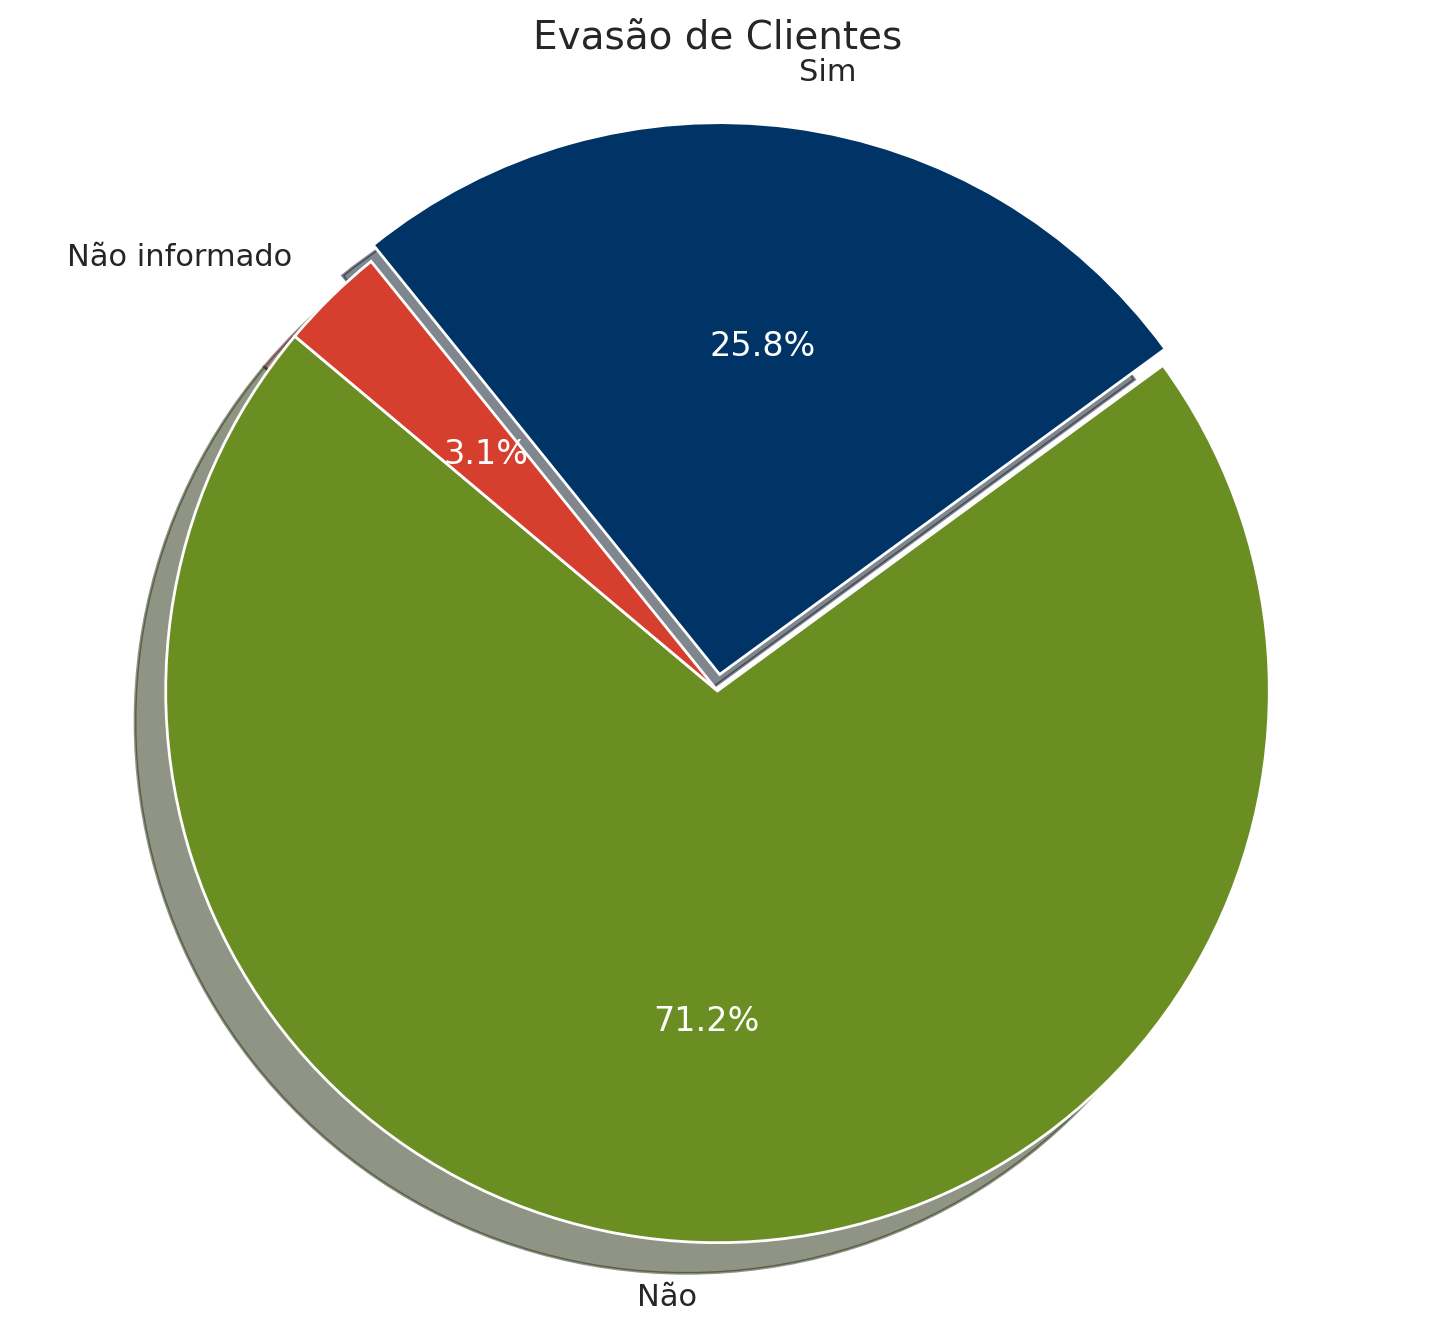


# 4. Conclusões

* A maioria dos cancelamentos ocorre nos primeiros meses.

* Formas de pagamento menos práticas, como Electronic Check, influenciam na saída.

* Clientes que pagam mais e usam menos serviços extras têm maior chance de cancelar.



# 5. Recomendações

* Incentivar contratos longos com benefícios progressivos.

* Oferecer pacotes adicionais de valor (ex: segurança, suporte premium).

* Facilitar pagamentos com opções modernas como cartão e PIX.

* Acompanhar novos clientes com boas-vindas personalizadas e suporte extra.